# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('gulamah.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Gulamah
Produksi Hasil Tangkap Laut,
2017-01-01,7.3
2017-02-01,7.6
2017-03-01,8.3
2017-04-01,7.8
2017-05-01,8.1
2017-06-01,7.7
2017-07-01,8.6
2017-08-01,9.3
2017-09-01,9.1


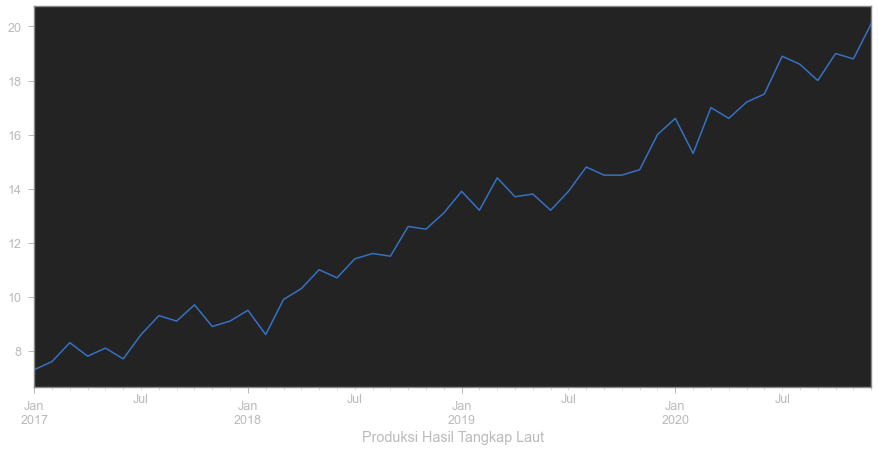

In [3]:
data['Gulamah'].plot(figsize=(15,7));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Gulamah'])

Augmented Dickey-Fuller Test:
ADF test statistic       0.853371
p-value                  0.992451
# lags used              2.000000
# observations          45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344

Weak evidence against the null hypothesis
Accept the null hypothesis
Data has a unit root and is non-stationary


Data is NON-STATIONARY

### 4. Differencing

In [5]:
data['Gulamah d1'] = diff(data['Gulamah'], k_diff=1)     #lag 1

# cek stationarity again
adfuller_test(data['Gulamah d1'])

Augmented Dickey-Fuller Test:
ADF test statistic     -6.776283e+00
p-value                 2.565873e-09
# lags used             1.000000e+00
# observations          4.500000e+01
critical value (1%)    -3.584829e+00
critical value (5%)    -2.928299e+00
critical value (10%)   -2.602344e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## 5. Check Seasonality Data

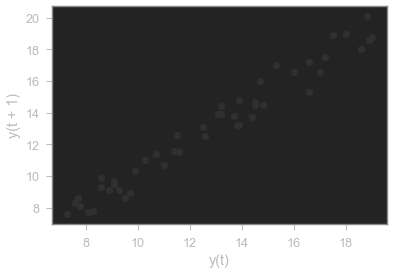

In [6]:
# With lag plot
lag_plot(data['Gulamah']);

terlihat trend dan seasonality

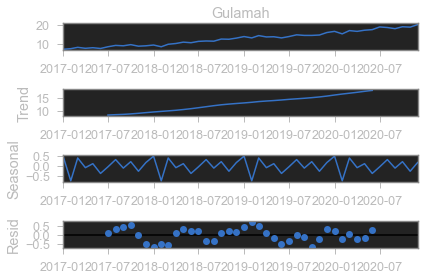

In [7]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Gulamah'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY, terlihat range seasonality di (-0.5, 0.5) dan trend di (10,15). Jika seasonality dimasukkan ke trend itu akan mengubah plot karena seasonalitynya cukup besar untuk trend, maka terdapat seasonality pada data. Gunakan SARIMA MODEL

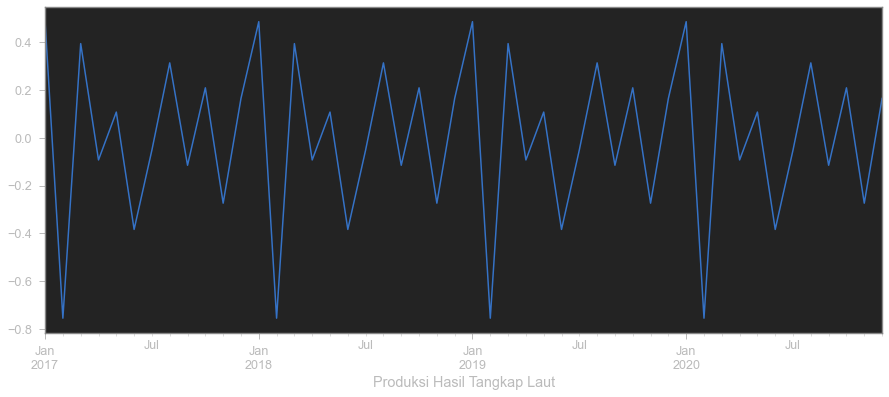

In [8]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

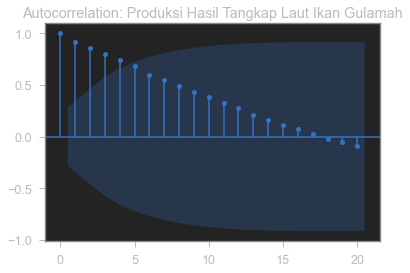

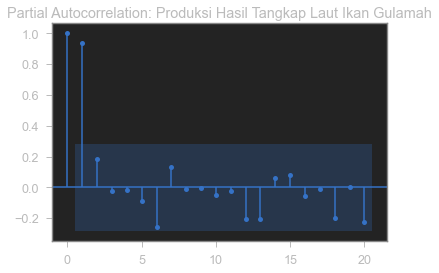

In [9]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Ikan Gulamah'
plot_acf(data['Gulamah'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Ikan Gulamah'
plot_pacf(data['Gulamah'],title=title,lags=lags);

In [10]:
# autoarima
auto_arima(data['Gulamah'], seasonal=True, stationary=False, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=103.245, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=90.053, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=90.246, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=107.950, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=92.509, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=85.038, Time=0.23 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=86.535, Time=0.44 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=87.911, Time=0.32 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=84.334, Time=0.18 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=89.661, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=85.824, Time=0.40 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=87.073, Time=0.27 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=83.877, Time=0.32 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=88.73

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

Gunakan SARIMA(1,1,2)(2,0,0)

## 7. Split Data

In [11]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Gulamah'].iloc[:-6]
test_data = data['Gulamah'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01     7.3
 2017-02-01     7.6
 2017-03-01     8.3
 2017-04-01     7.8
 2017-05-01     8.1
 2017-06-01     7.7
 2017-07-01     8.6
 2017-08-01     9.3
 2017-09-01     9.1
 2017-10-01     9.7
 2017-11-01     8.9
 2017-12-01     9.1
 2018-01-01     9.5
 2018-02-01     8.6
 2018-03-01     9.9
 2018-04-01    10.3
 2018-05-01    11.0
 2018-06-01    10.7
 2018-07-01    11.4
 2018-08-01    11.6
 2018-09-01    11.5
 2018-10-01    12.6
 2018-11-01    12.5
 2018-12-01    13.1
 2019-01-01    13.9
 2019-02-01    13.2
 2019-03-01    14.4
 2019-04-01    13.7
 2019-05-01    13.8
 2019-06-01    13.2
 2019-07-01    13.9
 2019-08-01    14.8
 2019-09-01    14.5
 2019-10-01    14.5
 2019-11-01    14.7
 2019-12-01    16.0
 2020-01-01    16.6
 2020-02-01    15.3
 2020-03-01    17.0
 2020-04-01    16.6
 2020-05-01    17.2
 2020-06-01    17.5
 Freq: MS, Name: Gulamah, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    18.9
 2020-08-01    18.6
 2020-09-01    18.0


## 8. SARIMA Train Model

SARIMA(1,1,2)(2,0,0,12)

In [12]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(1,1,2), seasonal_order=(2,0,0,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Gulamah   No. Observations:                   42
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood                 -33.582
Date:                             Sun, 12 Dec 2021   AIC                             79.164
Time:                                     20:23:19   BIC                             89.445
Sample:                                 01-01-2017   HQIC                            82.908
                                      - 06-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5685      0.850     -0.669      0.503      -2.234       1.097
ma.L1          0.5113      0.844      0.606      0.545      -1.143       2.166
ma.L2         -0.1470      0.178     -0.827      0.408      -0.496       0.202
ar.S.L12       0.3541      0.157      2.251      0.024       0.046       0.662
ar.S.L24       0.4624      0.216      2.142      0.032       0.039       0.885
sigma2         0.2214      0.093      2.373      0.018       0.039       0.404
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.43   Prob(JB):                         0.28
Heteroskedasticity (H):               1.22   Skew:                            -0.46
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,2)(2,0,0,12) Prediction')
prediction_test

2020-07-01    17.941702
2020-08-01    18.343510
2020-09-01    18.196354
2020-10-01    18.701954
2020-11-01    18.728243
2020-12-01    19.464979
Freq: MS, Name: SARIMA(1,1,2)(2,0,0,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

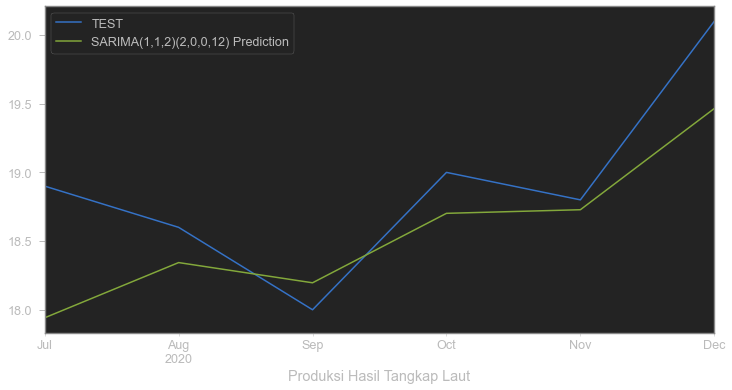

In [14]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

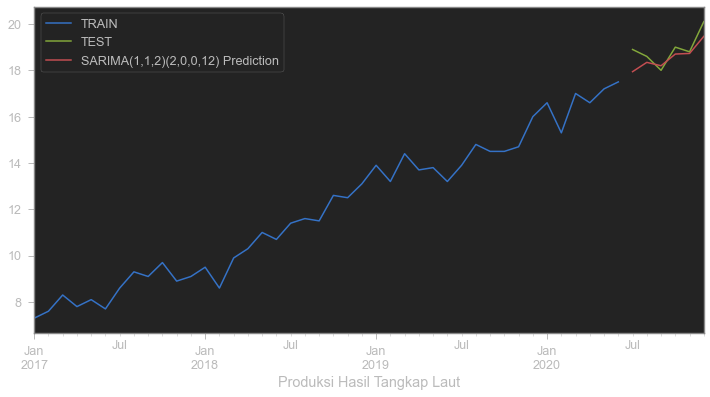

In [15]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

## 10. Evaluate Model

In [16]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 12.023809523809524
Standard Deviation Train data --> 3.0783912114347642


RMSE Error: 0.5033074362
AIC: 79.164


Mean Test data --> 18.900000000000002
Mean Prediction results --> 18.562790239493253


## 11. Re-Fit Model to Entire Dataset

In [17]:
model_SARIMA = SARIMAX(data['Gulamah'], order=(1,1,2), seasonal_order=(2,0,0,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Gulamah   No. Observations:                   48
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood                 -38.772
Date:                             Sun, 12 Dec 2021   AIC                             89.544
Time:                                     20:23:21   BIC                            100.645
Sample:                                 01-01-2017   HQIC                            93.721
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0382      0.973     -0.039      0.969      -1.946       1.869
ma.L1         -0.0152      0.985     -0.015      0.988      -1.947       1.916
ma.L2         -0.1708      0.168     -1.017      0.309      -0.500       0.158
ar.S.L12       0.3296      0.140      2.350      0.019       0.055       0.605
ar.S.L24       0.5344      0.182      2.944      0.003       0.179       0.890
sigma2         0.2147      0.082      2.614      0.009       0.054       0.376
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.43   Prob(JB):                         0.28
Heteroskedasticity (H):               1.44   Skew:                            -0.34
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [18]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,2)(2,0,0,12) Forecast')
forecast

2021-01-01    20.737857
2021-02-01    19.834112
2021-03-01    21.039673
2021-04-01    20.533565
2021-05-01    20.784790
2021-06-01    20.563013
Freq: MS, Name: SARIMA(1,1,2)(2,0,0,12) Forecast, dtype: float64

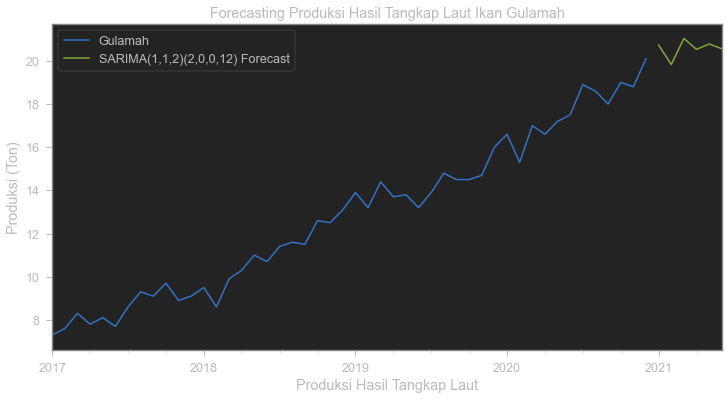

In [19]:
# PLOT
data['Gulamah'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Ikan Gulamah', ylabel='Produksi (Ton)');

Look! Prediksinya naik. Meskipun tidak diketahui errornya tapi jika dilihat, kita pun akan berpikir trendnya akan seperti itu.

In [20]:
# save model
model_SARIMA.save('model_gulamah.pkl')